## Task 1: Give a short description of the Frequent Itemset analysis. 

Answer: the idea of the Frequent Itemset analysis is to find common patterns in a dataset, relationships between items that make up objects. for instance, which products are Mostly sold together? for example, In the course lecture, the market-based model is represented which contains a large set of items things sold in the market such as beer, milk, chips, and so on. So that we can try to figure out which items are sold together. The idea is to find a relationship on what products are sold together more. For example, in my opinion, people usually buy chips and beer together on a weekend which means that they may plan to watch a movie, since beer and chips indispensable duo when watching a movie. the well known and most common used method is Apriori-Algorithm.

 ## Task 2: How is the FP-Growth algorithm solving the Frequent Itemset problem? (Search from the net.) 

The FP-Growth algorithm is an association rules algorithm that is used to find common object sets, can efficiently use system resources, and run fast on large data sets. the most important feature is that it keeps the entire database in the form of a compressed tree data structure called FP-Tree (Frequent Pattern Tree). The algorithm scans the database twice in total, calculates the support value of all items in the first scan, and creates the tree data structure in the second scan. Generally, the algorithm consists of three steps. Calculation of support numbers, establishment of Fp-Tree structure and extraction of rules from tree structure. Among the support numbers found when the database is scanned for the first time, those smaller than the minimum support value are excluded from the calculation. for example, in the table below contains an example of a shopping cart, each letter in this table represents a product, in the table you can see products purchased at the same time in different purchases. In the first stage, the database is scanned once to find the support values and the support numbers of the products are calculated. This table makes it easy to navigate the tree and keep track of the same nodes connected by pointers in the tree. The minimum support value is assumed to be 2 for this example, so product {e} will not be included in the calculations. According to the support values found, the products are listed as those with the lowest support value from the largest support value. The common items found are (c: 5), (a: 4), (b: 3), (d: 3), (f: 2). At the same time, the items in each shopping cart are sorted according to their frequency. This is how FP-Growth algorithm solving the Frequent Itemset problem.

Shopping ID|Items in Basket|Sequential Products
--- | --- |--- 
1|a, b, c|c, a, b
2|c, d, a|c, a, d
3|e, f, c, b|c, b, f
4|a, b, c, d, e|c, a, d, b
5|a, c, d, f|c, a, d, f

## Task 3 We will use the movielens database to find recurring patterns. What did you find out by using Frequent Itemset analysis on movielens dataset? 

In [2]:
import os
import pyspark
from pyspark.sql import *

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc

os.system('wget http://files.grouplens.org/datasets/movielens/ml-1m.zip; unzip ml-1m.zip')


256

In [3]:

from pyspark.mllib.fpm import FPGrowth
lines = sc.textFile("ml-1m/movies.dat")
movienames = lines.map(lambda l: l.split("::")). \
            map(lambda p: ( int(p[0]), p[1] ) ).collect()
#convert to dictionary for printing lookup
movienames = dict( movienames )

#read ratings file as lines of text, assuming no errors on data
lines = sc.textFile("ml-1m/ratings.dat")
#group user ratings into (user, list of rated movie ids)
usermovies = lines.map(lambda l: l.split("::")). \
            map(lambda p: ( int(p[0]), int(p[1]) ) ).groupByKey()
#take only list part 
usermovies = usermovies.map(lambda p: list(p[1]))
usercount = usermovies.count()

model = FPGrowth.train(usermovies, minSupport=0.33, numPartitions=10)
result = model.freqItemsets()

for x in result.collect():
    keys = x[0]
    if len(keys)>1:
        fpairs = []
        for y in keys:
            fpairs.append(movienames[y])
        print(fpairs)
        print("Found in " + str(x[1]) + " user of " + str(usercount) + "\n")
        


['Raiders of the Lost Ark (1981)', 'Star Wars: Episode V - The Empire Strikes Back (1980)']
Found in 1999 user of 6040

['Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode IV - A New Hope (1977)']
Found in 2355 user of 6040

['Star Wars: Episode VI - Return of the Jedi (1983)', 'Star Wars: Episode V - The Empire Strikes Back (1980)']
Found in 2228 user of 6040

['Star Wars: Episode VI - Return of the Jedi (1983)', 'Star Wars: Episode IV - A New Hope (1977)']
Found in 2113 user of 6040



# Comment for task 3:
this code snippet gives us how many users rated the movies that provided in database. this is somehow we can see Which person watched what kind of movie or we can see how close the audience’s or viewer’s movie tastes are. recurrent patterns or Frequent patterns are itemsets, subsequences, or substructures that appear in a data set with frequency. For example, a set of movies, such as ['E.T. the Extra-Terrestrial (1982)', 'Back to the Future (1985)'], that rated frequently together (Found in 1589 user of 6040) in the movielens data set.for example, the first output is the movies E.T. the Extra-Terrestrial and Back to the future has rated by 1589 viewers out of 6040. 
on the other hand if we have the following output 
['E.T. the Extra-Terrestrial (1982)', 'Back to the Future (1985)', 'Star Wars: Episode V - The Empire Strikes Back (1980)']
Found in 1402 user of 6040 
Which means we added one more movie in list then it has been rated by 1402 user out of 6040.


# Task 4

In [4]:


lines = sc.textFile("ml-1m/movies.dat")
movienames = lines.map(lambda l: l.split("::")). \
            map(lambda p: ( int(p[0]), p[1] ) ).collect()
#convert to dictionary for printing lookup
movienames = dict( movienames )

#read ratings file as lines of text, assuming no errors on data
lines = sc.textFile("ml-1m/ratings.dat")
#group user ratings into (user, list of rated movie ids)
usermovies = lines.map(lambda l: l.split("::")). \
            map(lambda p: ( int(p[0]), int(p[1]) ) ).groupByKey()
#take only list part 
usermovies = usermovies.map(lambda p: list(p[1]))
usercount = usermovies.count()
import numpy as np
k = np.arange(0.30, 0.4, 0.01)
for minSupport in k:
    model = FPGrowth.train(usermovies, minSupport=minSupport, numPartitions=10)
    result = model.freqItemsets()
    print('\033[1m'+'\033[91m' + "At least {}% of the movie raters have seen.".format(minSupport)+'\033[0m')
    
    for x in result.collect():
        keys = x[0] 
        if len(keys)>1:
            fpairs = []
            for y in keys:
                fpairs.append(movienames[y])            
            print(fpairs)
            print("Found in " + str(x[1]) + " user of " + str(usercount) + "\n")
       



At least 0.3% of the movie raters have seen.
['Men in Black (1997)', 'Jurassic Park (1993)']
Found in 1939 user of 6040

['Men in Black (1997)', 'Terminator 2: Judgment Day (1991)']
Found in 1855 user of 6040

['Raiders of the Lost Ark (1981)', 'Star Wars: Episode V - The Empire Strikes Back (1980)']
Found in 1999 user of 6040

['Raiders of the Lost Ark (1981)', 'Star Wars: Episode IV - A New Hope (1977)']
Found in 1972 user of 6040

['Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode IV - A New Hope (1977)']
Found in 2355 user of 6040

['Star Wars: Episode V - The Empire Strikes Back (1980)', 'American Beauty (1999)']
Found in 1829 user of 6040

['Being John Malkovich (1999)', 'American Beauty (1999)']
Found in 1884 user of 6040

['Fargo (1996)', 'American Beauty (1999)']
Found in 1856 user of 6040

['Star Wars: Episode VI - Return of the Jedi (1983)', 'Star Wars: Episode V - The Empire Strikes Back (1980)']
Found in 2228 user of 6040

['Star Wars: Episode VI

# Comment for task 4
if we look at the results above it can be seen that there is no results once the minSupport becomes 38%


##  Task 5: Think what would happen if you put minimum support to 0. (Do not try it will crash.) 

minSupport value given in FPGrowth.train for example, movies that at least 30% of the movie raters have seen means minSupport is 0.3. in the previous task as I did after increasing this value the number of recurrent or frequent movies that rated, decrease naturally. if we set it to 0 then each movie will print out many times for each rater.  at first it was set up at 0.2. there were many combinations of frequent movies printed out if we decrease minimum support gradually then we will get more printed combinations for 0 I guess there will be so much combination that needs so much computational power.

 #              2. Text document similarity search

## Task 2.1 & Task 2.2 comment below

In [5]:
import pyspark
import re

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc

def make_shingles(text, shingle_len):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    for i in range( 0, len(text)-shingle_len-1 ):
        yield text[i:i+shingle_len] 

shingle_length = 3        
        
files = sc.wholeTextFiles('*.txt')
files = files.map(lambda p: (p[0].split("/")[-1], list(make_shingles( p[1] ,shingle_length) ) ) )
res = files.collect()
print(files.take(1))

[('universal_hash.txt', ['uni', 'niv', 'ive', 'ver', 'ers', 'rsa', 'sal', 'al ', 'l h', ' ha', 'has', 'ash', 'shi', 'hin', 'ing', 'ng ', 'g u', ' us', 'usi', 'sin', 'ing', 'ng ', 'g u', ' un', 'uni', 'niv', 'ive', 'ver', 'ers', 'rsa', 'sal', 'al ', 'l h', ' ha', 'has', 'ash', 'shi', 'hin', 'ing', 'ng ', 'g (', ' (i', '(in', 'in ', 'n a', ' a ', 'a r', ' ra', 'ran', 'and', 'ndo', 'dom', 'omi', 'miz', 'ize', 'zed', 'ed ', 'd a', ' al', 'alg', 'lgo', 'gor', 'ori', 'rit', 'ith', 'thm', 'hm ', 'm o', ' or', 'or ', 'r d', ' da', 'dat', 'ata', 'ta ', 'a s', ' st', 'str', 'tru', 'ruc', 'uct', 'ctu', 'tur', 'ure', 're)', 'e) ', ') r', ' re', 'ref', 'efe', 'fer', 'ers', 'rs ', 's t', ' to', 'to ', 'o s', ' se', 'sel', 'ele', 'lec', 'ect', 'cti', 'tin', 'ing', 'ng ', 'g a', ' a ', 'a h', ' ha', 'has', 'ash', 'sh ', 'h f', ' fu', 'fun', 'unc', 'nct', 'cti', 'tio', 'ion', 'on ', 'n a', ' at', 'at ', 't r', ' ra', 'ran', 'and', 'ndo', 'dom', 'om ', 'm f', ' fr', 'fro', 'rom', 'om ', 'm a', ' a ', 'a

### Comment for task 2.1.
shingle is one method to convert document words into a set of words. Each shingle has many words depend on the number of shingle_length values. for example, in the figure 1, the s shingle_length value is 10, and convert document words into a set of words. the first line of the setsim.txt is Set Similarity and Min Hash. and the following shingle for shingle length 10 will be 'setsimilar', 'etsimilari', 'tsimilarit', 'similarity', 'imilaritya', 'milarityan', 'ilarityand' and goes like this. Shingles separate parts of the text selected for comparison from the body of the text, with a certain number of words in its sequence to check for uniqueness. another thing is shingle can be used for checking similarity between document with the help of some similarity function such as Jaccard similarity.

###### some screenshots for different shingles length can be seen in below figures a

Shingles length is 10


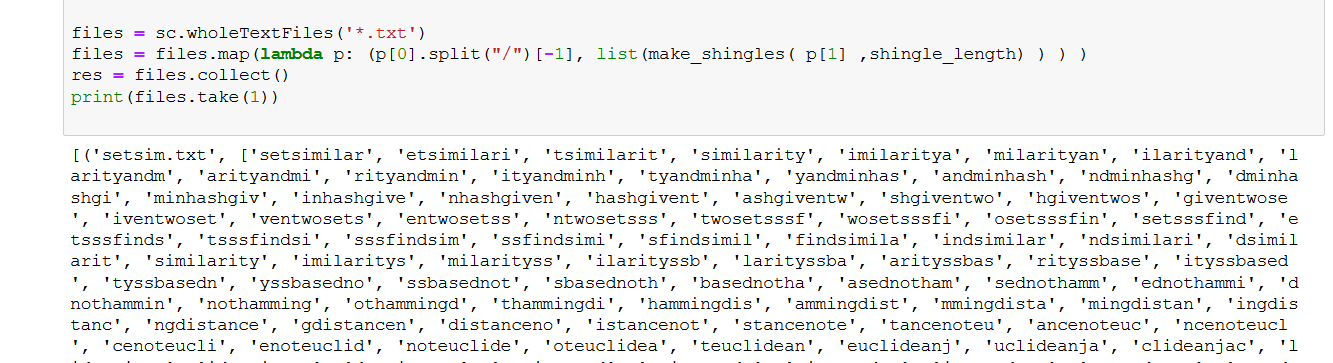

In [3]:
from IPython.display import Image
print("Shingles length is 10")
Image(filename='figure1.PNG') 


Shingles length is 3


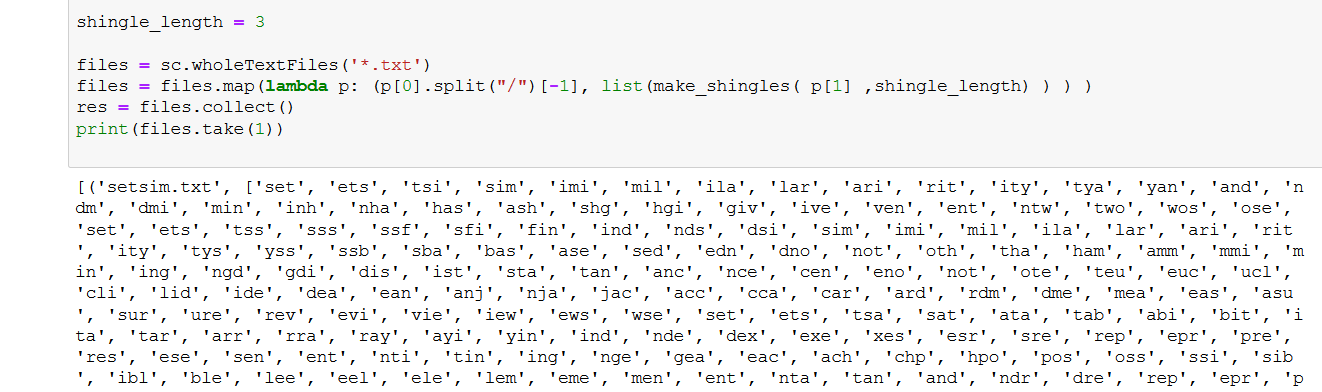

In [4]:
print("Shingles length is 3")
Image(filename='figure2.PNG') 

## Task 2.3: Why it is important to remove non-text characters and normalize whitespace characters etc? 

### Answer

The normalizing whitespace characters simplifies specification of tests against strings for which whitespace variations are insignificant.

## Task 2.4 comment below

In [12]:
import pyspark
import re

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc
from numpy import uint32    
from numpy import uint64
import random
import numpy
def generate_random_hash_params_A_P():
    A = random.getrandbits(64)
    P = random.getrandbits(64)
    while A>=P:
        A = random.getrandbits(64)
        P = random.getrandbits(64)
    return A , P

Ashingle, Pshingle = generate_random_hash_params_A_P()

def string_hash(shingle,slen,A,P):
    tmp = uint64(ord(shingle[0]))
    for i in range(1, slen):
        tmp = (tmp*uint64(A) + uint64(ord(shingle[i]))) % uint64(P)
    return uint32(tmp&uint64(0xFFFFFFFF))

def make_shingles(text, shingle_len):
    text = text.lower()
    text = re.sub(r'[^a-z]+', '',text )
    for i in range( 0, len(text)-shingle_len-1 ):
        yield string_hash(text[i:i+shingle_len],shingle_len, Ashingle, Pshingle)

shingle_length = 3      
        
files = sc.wholeTextFiles('*.txt')
files = files.map(lambda p: (p[0].split("/")[-1], list(make_shingles( p[1] ,shingle_length) ) ) )
res = files.collect()
print(files.take(1))

[('universal_hash.txt', [1060808274, 3224117151, 1843982068, 2776341761, 2758232878, 897854770, 323107026, 2701846963, 2268062453, 2031428596, 2523932998, 145193058, 3668798615, 206612046, 3888516468, 1941777033, 966107237, 1960477052, 206612046, 3888516468, 1941777028, 1060808274, 3224117151, 1843982068, 2776341761, 2758232878, 897854770, 323107026, 2701846963, 2268062453, 2031428596, 2523932998, 145193058, 3668798615, 206612046, 3888516456, 1633205640, 206612040, 1586747123, 708649002, 2582481349, 1456261251, 3318818181, 3339797708, 3349725087, 1242785756, 515183432, 585219885, 2532874400, 3695625637, 2701846962, 452778478, 221194080, 3836210440, 4219851379, 3089567779, 1018413257, 1758813590, 4125741480, 3836210435, 19585101, 3695625645, 44249684, 1196327228, 2523933010, 4167545361, 1991383971, 233455454, 1986334496, 2371876484, 3723455029, 3445790540, 1834869107, 2758232864, 1834869095, 1868475086, 1507597695, 2758232878, 897854789, 4167545358, 840499298, 1356527129, 2708089296, 41

## Comment for task 2.4
Answer: This time we convert each string into an integer and compare those instead of the strings. for example, the correspondence of the first string which is “set” is 3631826968. for example, it is useful when we Search for duplicate strings in an array of strings

shingles with spaces


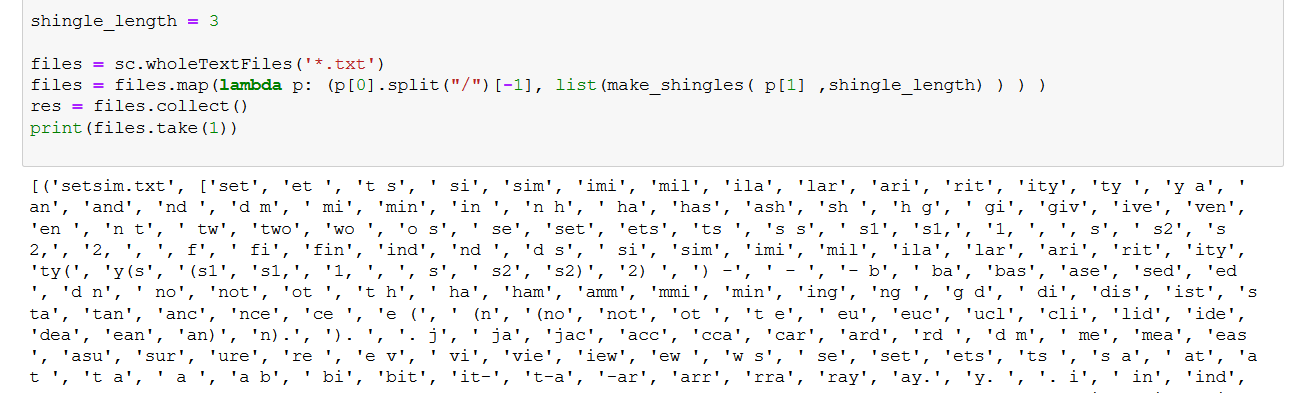

In [5]:
print("shingles with spaces")
Image(filename='figure3.PNG') 

#### a screenshot of the result above is also available in the provided word file

# Task 2.5 comment below

In [13]:
import pyspark
import re

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc
from numpy import uint32    
from numpy import uint64
import random
import numpy
def generate_random_hash_params_A_P():
    A = random.getrandbits(64)
    P = random.getrandbits(64)
    while A>=P:
        A = random.getrandbits(64)
        P = random.getrandbits(64)
    return A , P

Ashingle, Pshingle = generate_random_hash_params_A_P()

def string_hash(shingle,slen,A,P):
    tmp = uint64(ord(shingle[0]))
    for i in range(1, slen):
        tmp = (tmp*uint64(A) + uint64(ord(shingle[i]))) % uint64(P)
    return uint32(tmp&uint64(0xFFFFFFFF))

def make_shingles(text, shingle_len):
    text = text.lower()
    text = re.sub(r'[^a-z]+', '',text )
    for i in range( 0, len(text)-shingle_len-1 ):
        yield string_hash(text[i:i+shingle_len],shingle_len, Ashingle, Pshingle)

shingle_length = 3  
        
files = sc.wholeTextFiles('*.txt')
files = files.map(lambda p: (p[0].split("/")[-1], list(make_shingles( p[1] ,shingle_length) ) ) )
def uint32_hash(stringhashes,A):
    for i in range(0, len(stringhashes)):
        stringhashes[i] = uint32((uint64(A)*uint64(stringhashes[i])) >> uint64(32))
    return stringhashes

def min_hash(hashes,minhash_A):
    minhashes = []
    for i in range(0,len(minhash_A)):
        minhashes.append(min(uint32_hash(hashes,minhash_A[0])))
    return minhashes

#randomize minhash parameter
num_minhashes = 20
minhash_A = []
for i in range(0,num_minhashes):
    minhash_A.append( random.getrandbits(64) )
minhashes = files.map(lambda p: (p[0],min_hash(p[1],minhash_A)))
minhashes.cache() #cache result for performance
res = minhashes.collect()
for x in res:
    print(x)
    print("\n\n")

('universal_hash.txt', [444683, 1109913, 1105779, 2307480, 707791, 353103, 1522631, 69121, 696603, 2205647, 1802294, 687605, 1345699, 282348, 367435, 2816188, 1652171, 3025452, 77143, 2137013])



('turtles.txt', [147635, 951414, 1105779, 3982080, 178368, 76531, 1837530, 69121, 696603, 199575, 1451683, 687605, 1345699, 282348, 367435, 1444651, 572978, 150423, 13965, 1836394])



('tortoise.txt', [147635, 951414, 1105779, 4130869, 707791, 76531, 1837530, 69121, 696603, 199575, 1802294, 687605, 1041779, 282348, 367435, 1444651, 1652171, 1597953, 13965, 1836394])



('swissbank.txt', [147635, 951414, 1105779, 1127113, 221020, 76531, 1837530, 69121, 696603, 2205647, 1802294, 687605, 1041779, 282348, 367435, 1444651, 1652171, 1597953, 77143, 1836394])



('setsim.txt', [2105099, 7049453, 4224725, 508856, 707791, 353103, 1837530, 4655390, 11544791, 2205647, 3015687, 2516812, 1041779, 282348, 676104, 7348614, 4805075, 5396618, 784990, 1318714])



('rabbit.txt', [147635, 3686644, 1547868, 508

## Answer for task 2.5
Answer: in my case I got best result when num_minhases is 20. so that Jaccard estimate error is Minhashes_needed =(1/errorrate)^2 
√20 =  1/errorrate - errorrate = 22,3%


## Task 2.6 
: Do the shingle length value have effect on how well the similarity comparison works? Tune the shingle_length parameter. 

Yes, they affect the similarity. if we keep the shingle length low such as 2 or 3 then we will have higher similarity than when the single length high. because suppose that in some document we want to find similarity for word Mehmet, if I keep the single length 2, there may be a lot of words me in documents. but if the single length is 6 then we will have less similarity. for example, the similarity between rabbit.txt and bank.txt is 80% when the single length is 3. but the similarity between rabbit.txt and bank.txt is 10% when the single length is 5. 

## Taks 2.7

In [15]:
for x in res:
    jaccrow = minhashes.map(lambda p: (p[0],sum(numpy.array(p[1])-numpy.array(x[1])==0)/num_minhashes)).collect()
    for y in jaccrow:
        print(x[0].ljust(20) + " vs. " + y[0].ljust(20) + " similarity: " + str(y[1]*100) + " %")


universal_hash.txt   vs. universal_hash.txt   similarity: 100.0 %
universal_hash.txt   vs. turtles.txt          similarity: 35.0 %
universal_hash.txt   vs. tortoise.txt         similarity: 45.0 %
universal_hash.txt   vs. swissbank.txt        similarity: 50.0 %
universal_hash.txt   vs. setsim.txt           similarity: 20.0 %
universal_hash.txt   vs. rabbit.txt           similarity: 40.0 %
universal_hash.txt   vs. minhash.txt          similarity: 50.0 %
universal_hash.txt   vs. mapreduce.txt        similarity: 60.0 %
universal_hash.txt   vs. lsh.txt              similarity: 40.0 %
universal_hash.txt   vs. hares.txt            similarity: 50.0 %
universal_hash.txt   vs. hadoop.txt           similarity: 45.0 %
universal_hash.txt   vs. catfood.txt          similarity: 50.0 %
universal_hash.txt   vs. cat.txt              similarity: 35.0 %
universal_hash.txt   vs. bank.txt             similarity: 35.0 %
turtles.txt          vs. universal_hash.txt   similarity: 35.0 %
turtles.txt          vs.

hares.txt            vs. universal_hash.txt   similarity: 50.0 %
hares.txt            vs. turtles.txt          similarity: 45.0 %
hares.txt            vs. tortoise.txt         similarity: 60.0 %
hares.txt            vs. swissbank.txt        similarity: 65.0 %
hares.txt            vs. setsim.txt           similarity: 15.0 %
hares.txt            vs. rabbit.txt           similarity: 55.00000000000001 %
hares.txt            vs. minhash.txt          similarity: 45.0 %
hares.txt            vs. mapreduce.txt        similarity: 60.0 %
hares.txt            vs. lsh.txt              similarity: 40.0 %
hares.txt            vs. hares.txt            similarity: 100.0 %
hares.txt            vs. hadoop.txt           similarity: 65.0 %
hares.txt            vs. catfood.txt          similarity: 45.0 %
hares.txt            vs. cat.txt              similarity: 55.00000000000001 %
hares.txt            vs. bank.txt             similarity: 50.0 %
hadoop.txt           vs. universal_hash.txt   similarity: 45.0 

## Comment for task 2.7
results are in the provided word file referring to this question "Find two best matches between each input files "
Note: if there are two identical proportions in the same txt file green highlighted.